# Import thư viện

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from nn_model import DeepNeuralNetwork
import matplotlib.pyplot as plt
import random

# Load data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [3]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

# Hàm vẽ biểu đồ và test model

In [3]:
def test(model, size = 5):
	fig, ax = plt.subplots(1, size, figsize=(30, 5))
	
	for i in range(size):
		idx = random.randint(0, len(x_test)-1)
		pred = model.predict(x_test[idx]).argmax()
		ax[i].imshow(x_test[idx].reshape(28,28), cmap='gray')
		ax[i].set_title('predict label: {} | true label: {}'.format(class_names[pred], class_names[y_test[idx].argmax()]))
		ax[i].axis('off')
	plt.show()

def plot(h):
	_, ax = plt.subplots(1, 2, figsize=(20, 5))
	
	ax[0].plot(h['acc'])
	ax[0].plot(h['val_acc'])
	ax[0].set_title('model accuracy')
	ax[0].set_ylabel('accuracy')
	ax[0].set_xlabel('epoch')
	ax[0].legend(['train', 'val'])

	ax[1].plot(h['loss'])
	ax[1].plot(h['val_loss'])
	ax[1].set_title('model loss')
	ax[1].set_ylabel('loss')
	ax[1].set_xlabel('epoch')
	ax[1].legend(['train', 'val'])

# 2 hidden layers [64, 32] | activation sigoid | optimizer sgd

In [4]:
dnn1 = DeepNeuralNetwork(layers=[784, 64, 32, 10], activation='sigmoid')
h1 = dnn1.fit(x_train, y_train, x_test, y_test, batch_size=64, epochs=25, optimizer='sgd', l_rate=0.01)

Epoch    1: acc = 0.4639 | loss = 2.2216 | val_acc = 0.4594 | val_loss = 2.2219
Epoch    2: acc = 0.5571 | loss = 2.0463 | val_acc = 0.5510 | val_loss = 2.0469
Epoch    3: acc = 0.5202 | loss = 1.6977 | val_acc = 0.5209 | val_loss = 1.6993
Epoch    4: acc = 0.5768 | loss = 1.4175 | val_acc = 0.5765 | val_loss = 1.4210
Epoch    5: acc = 0.6315 | loss = 1.2411 | val_acc = 0.6216 | val_loss = 1.2466
Epoch    6: acc = 0.6537 | loss = 1.1175 | val_acc = 0.6459 | val_loss = 1.1249
Epoch    7: acc = 0.6655 | loss = 1.0242 | val_acc = 0.6560 | val_loss = 1.0333
Epoch    8: acc = 0.6845 | loss = 0.9522 | val_acc = 0.6739 | val_loss = 0.9625
Epoch    9: acc = 0.6977 | loss = 0.8959 | val_acc = 0.6877 | val_loss = 0.9072
Epoch   10: acc = 0.7090 | loss = 0.8509 | val_acc = 0.7010 | val_loss = 0.8631
Epoch   11: acc = 0.7182 | loss = 0.8135 | val_acc = 0.7108 | val_loss = 0.8264
Epoch   12: acc = 0.7257 | loss = 0.7817 | val_acc = 0.7196 | val_loss = 0.7953
Epoch   13: acc = 0.7317 | loss = 0.7545

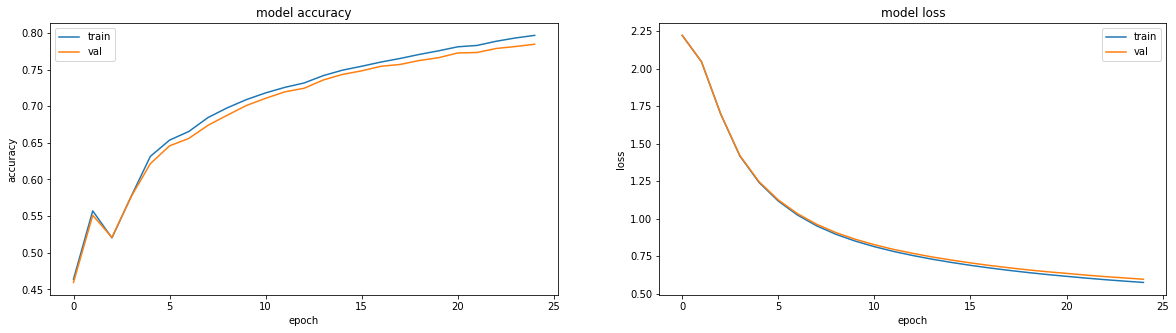

In [5]:
plot(h1)

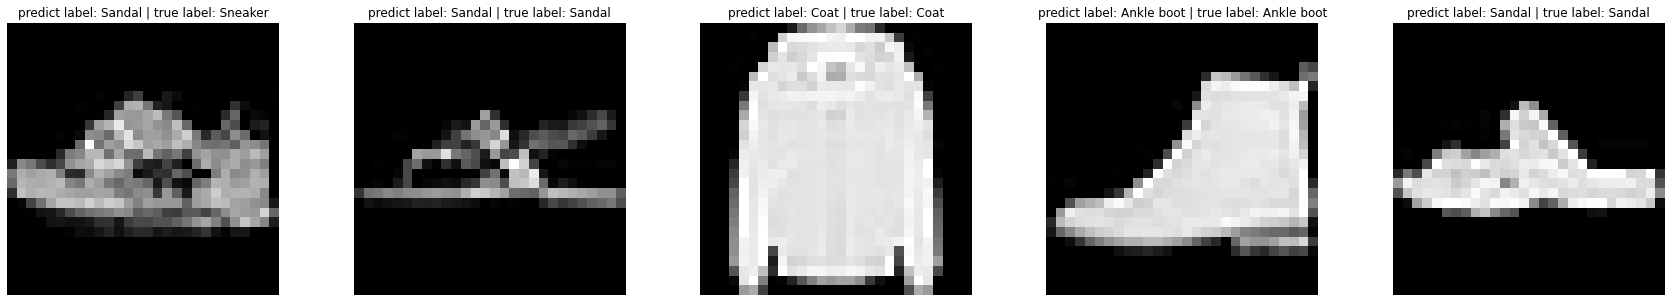

In [6]:
test(dnn1)

# 2 hidden layers [64, 32] | activation relu | optimizer sgd

In [7]:
dnn2 = DeepNeuralNetwork(layers=[784, 64, 32, 10], activation='relu')
h2 = dnn2.fit(x_train, y_train, x_test, y_test, batch_size=64, epochs=25, optimizer='sgd', l_rate=0.01)

Epoch    1: acc = 0.7512 | loss = 0.6988 | val_acc = 0.7394 | val_loss = 0.7187
Epoch    2: acc = 0.7948 | loss = 0.5877 | val_acc = 0.7828 | val_loss = 0.6079
Epoch    3: acc = 0.8076 | loss = 0.5467 | val_acc = 0.7956 | val_loss = 0.5724
Epoch    4: acc = 0.8229 | loss = 0.5069 | val_acc = 0.8107 | val_loss = 0.5342
Epoch    5: acc = 0.8269 | loss = 0.4901 | val_acc = 0.8155 | val_loss = 0.5181
Epoch    6: acc = 0.8334 | loss = 0.4715 | val_acc = 0.8218 | val_loss = 0.5031
Epoch    7: acc = 0.8432 | loss = 0.4511 | val_acc = 0.8292 | val_loss = 0.4831
Epoch    8: acc = 0.8423 | loss = 0.4529 | val_acc = 0.8286 | val_loss = 0.4875
Epoch    9: acc = 0.8501 | loss = 0.4339 | val_acc = 0.8357 | val_loss = 0.4689
Epoch   10: acc = 0.8485 | loss = 0.4376 | val_acc = 0.8333 | val_loss = 0.4755
Epoch   11: acc = 0.8477 | loss = 0.4348 | val_acc = 0.8315 | val_loss = 0.4741
Epoch   12: acc = 0.8523 | loss = 0.4248 | val_acc = 0.8340 | val_loss = 0.4635
Epoch   13: acc = 0.8546 | loss = 0.4206

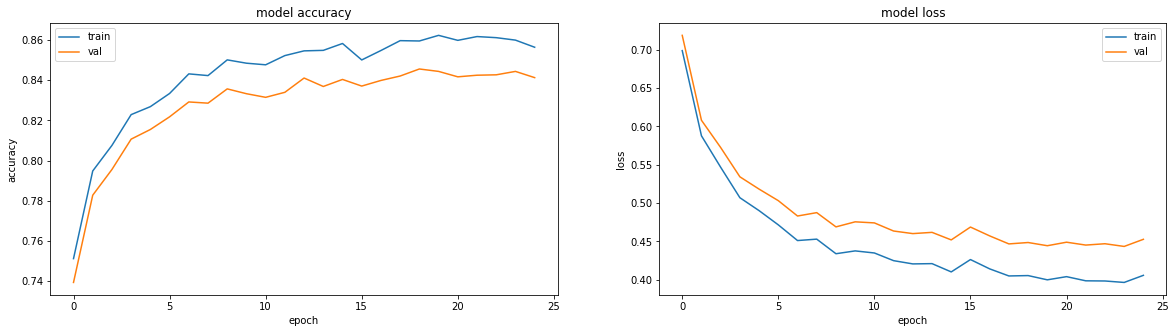

In [8]:
plot(h2)

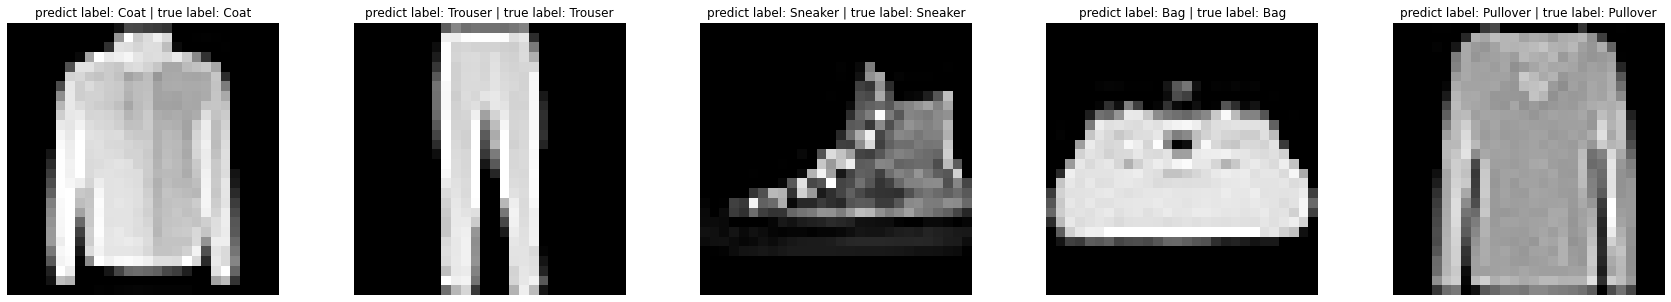

In [9]:
test(dnn2)

# 4 hidden layers [128, 64, 32, 32] | activation relu | optimizer momentum

In [10]:
dnn3 = DeepNeuralNetwork(layers=[784, 128, 64, 32, 32, 10], activation='relu')
h3 = dnn3.fit(x_train, y_train, x_test, y_test, batch_size=64, epochs=25, optimizer='momentum', l_rate=0.001)

Epoch    1: acc = 0.2147 | loss = 2.1514 | val_acc = 0.2150 | val_loss = 2.1512
Epoch    2: acc = 0.3642 | loss = 1.6941 | val_acc = 0.3660 | val_loss = 1.6945
Epoch    3: acc = 0.5479 | loss = 1.2049 | val_acc = 0.5452 | val_loss = 1.2095
Epoch    4: acc = 0.6131 | loss = 0.9719 | val_acc = 0.6113 | val_loss = 0.9807
Epoch    5: acc = 0.6775 | loss = 0.8610 | val_acc = 0.6706 | val_loss = 0.8718
Epoch    6: acc = 0.7042 | loss = 0.7934 | val_acc = 0.6993 | val_loss = 0.8046
Epoch    7: acc = 0.7245 | loss = 0.7448 | val_acc = 0.7173 | val_loss = 0.7586
Epoch    8: acc = 0.7393 | loss = 0.7108 | val_acc = 0.7322 | val_loss = 0.7244
Epoch    9: acc = 0.7463 | loss = 0.6833 | val_acc = 0.7384 | val_loss = 0.6981
Epoch   10: acc = 0.7545 | loss = 0.6577 | val_acc = 0.7470 | val_loss = 0.6752
Epoch   11: acc = 0.7631 | loss = 0.6389 | val_acc = 0.7565 | val_loss = 0.6570
Epoch   12: acc = 0.7754 | loss = 0.6208 | val_acc = 0.7658 | val_loss = 0.6408
Epoch   13: acc = 0.7782 | loss = 0.6056

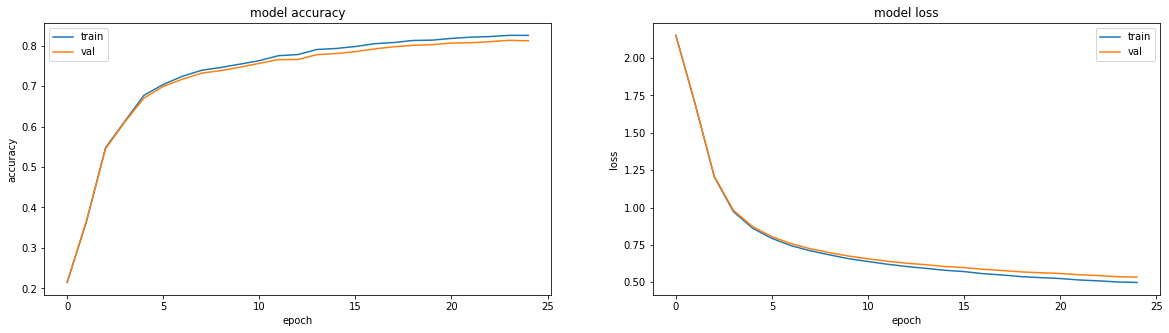

In [11]:
plot(h3)

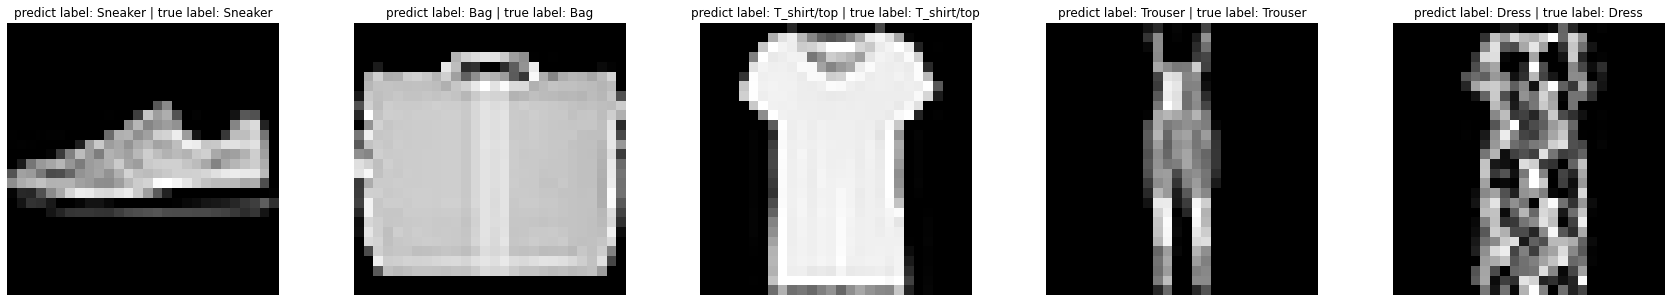

In [12]:
test(dnn3)

# 4 hidden layers [128, 64, 32, 32] | activation relu | optimizer adam

In [16]:
dnn4 = DeepNeuralNetwork(layers=[784, 128, 64, 32, 32, 10], activation='relu')
h4 = dnn4.fit(x_train, y_train, x_test, y_test, batch_size=64, epochs=25, optimizer='adam', l_rate=0.0001)

Epoch    1: acc = 0.6982 | loss = 0.7709 | val_acc = 0.6913 | val_loss = 0.7872
Epoch    2: acc = 0.7518 | loss = 0.6743 | val_acc = 0.7395 | val_loss = 0.6934
Epoch    3: acc = 0.7952 | loss = 0.5803 | val_acc = 0.7851 | val_loss = 0.6072
Epoch    4: acc = 0.8130 | loss = 0.5342 | val_acc = 0.7993 | val_loss = 0.5661
Epoch    5: acc = 0.8222 | loss = 0.5074 | val_acc = 0.8079 | val_loss = 0.5412
Epoch    6: acc = 0.8287 | loss = 0.4875 | val_acc = 0.8161 | val_loss = 0.5207
Epoch    7: acc = 0.8347 | loss = 0.4708 | val_acc = 0.8185 | val_loss = 0.5072
Epoch    8: acc = 0.8408 | loss = 0.4600 | val_acc = 0.8249 | val_loss = 0.4980
Epoch    9: acc = 0.8433 | loss = 0.4521 | val_acc = 0.8270 | val_loss = 0.4915
Epoch   10: acc = 0.8475 | loss = 0.4400 | val_acc = 0.8339 | val_loss = 0.4807
Epoch   11: acc = 0.8503 | loss = 0.4316 | val_acc = 0.8345 | val_loss = 0.4739
Epoch   12: acc = 0.8513 | loss = 0.4283 | val_acc = 0.8365 | val_loss = 0.4728
Epoch   13: acc = 0.8526 | loss = 0.4242

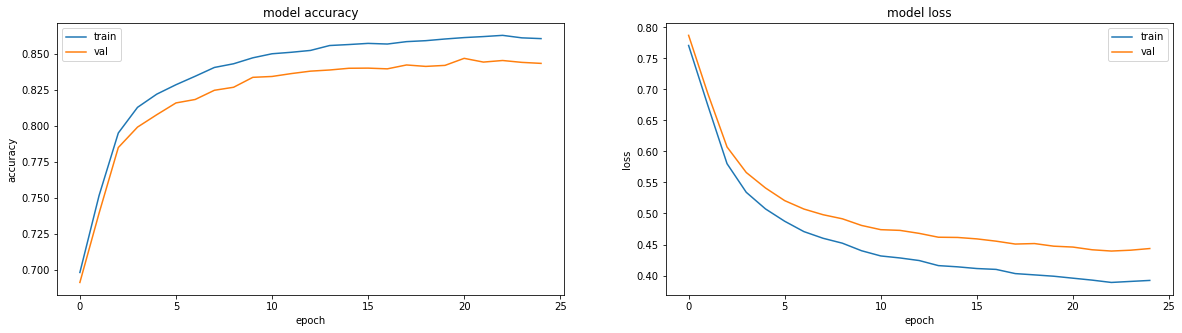

In [17]:
plot(h4)

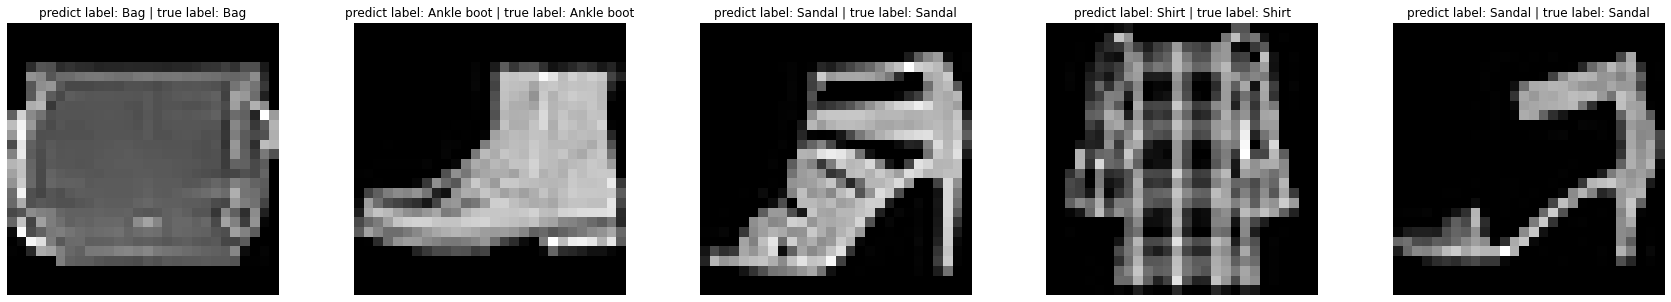

In [20]:
test(dnn4)